In [1]:
# Importing libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'fitur 1': [4,2,7,3,9,6],
    'fitur 2': [8,3,2,7,6,9]}
df=pd.DataFrame(data)
df

,fitur 1,fitur 2
0,4,8
1,2,3
2,7,2
3,3,7
4,9,6
5,6,9


<Axes: >

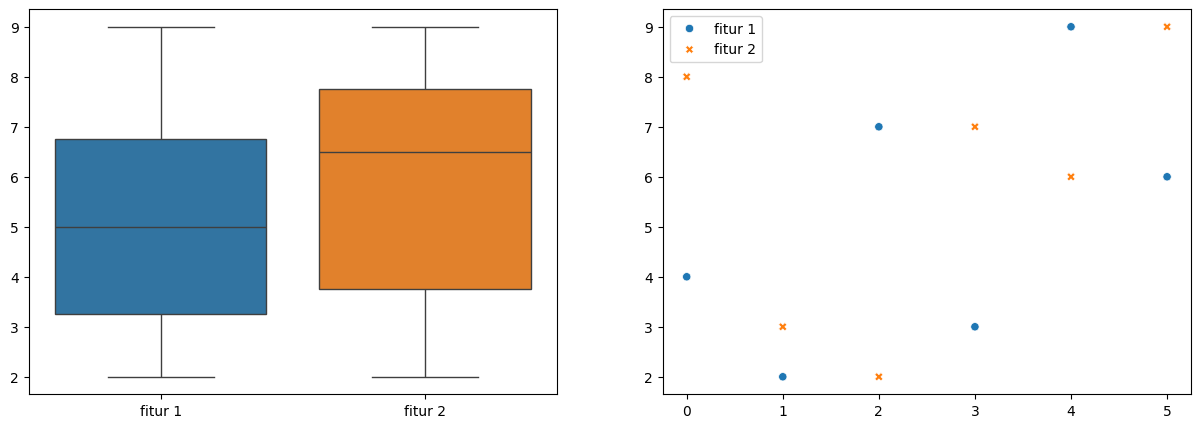

In [3]:
fig, axs= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=df, ax=axs[0])
sns.scatterplot(data=df, ax=axs[1])

# NORMALISASI 1

In [4]:
df=pd.DataFrame(data)

In [5]:
def normalize(column):
    normal_data=(column - column.mean()) /column.std(ddof=1)
    return normal_data

for col in df.columns:
    df[f'mean {col}'] = df[col].mean()
    df[f'standar dev {col}']= df[col].std(ddof=1)
    df[f'normalisasi {col}'] = normalize(df[col])


df

,fitur 1,fitur 2,mean fitur 1,standar dev fitur 1,normalisasi fitur 1,mean fitur 2,standar dev fitur 2,normalisasi fitur 2
0,4,8,5.166667,2.639444,-0.442012,5.833333,2.786874,0.777454
1,2,3,5.166667,2.639444,-1.199747,5.833333,2.786874,-1.016671
2,7,2,5.166667,2.639444,0.694591,5.833333,2.786874,-1.375496
3,3,7,5.166667,2.639444,-0.820880,5.833333,2.786874,0.418629
4,9,6,5.166667,2.639444,1.452326,5.833333,2.786874,0.059804
5,6,9,5.166667,2.639444,0.315723,5.833333,2.786874,1.136279


<Axes: >

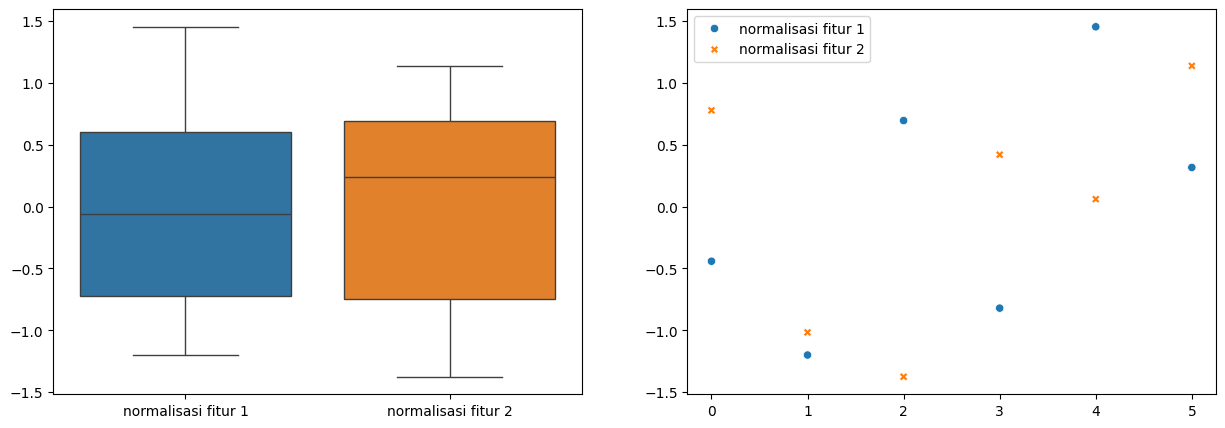

In [6]:
fig, axs= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[0])
sns.scatterplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[1])

# NORMALISASI 2

In [7]:
df=pd.DataFrame(data)

In [8]:
def normalize(column):
    normal_data=(column - column.min()) / (column.max() - column.min())
    return normal_data

for col in df.columns:
    df[f'normalisasi {col}'] = normalize(df[col])

df

,fitur 1,fitur 2,normalisasi fitur 1,normalisasi fitur 2
0,4,8,0.285714,0.857143
1,2,3,0.000000,0.142857
2,7,2,0.714286,0.000000
3,3,7,0.142857,0.714286
4,9,6,1.000000,0.571429
5,6,9,0.571429,1.000000


<Axes: >

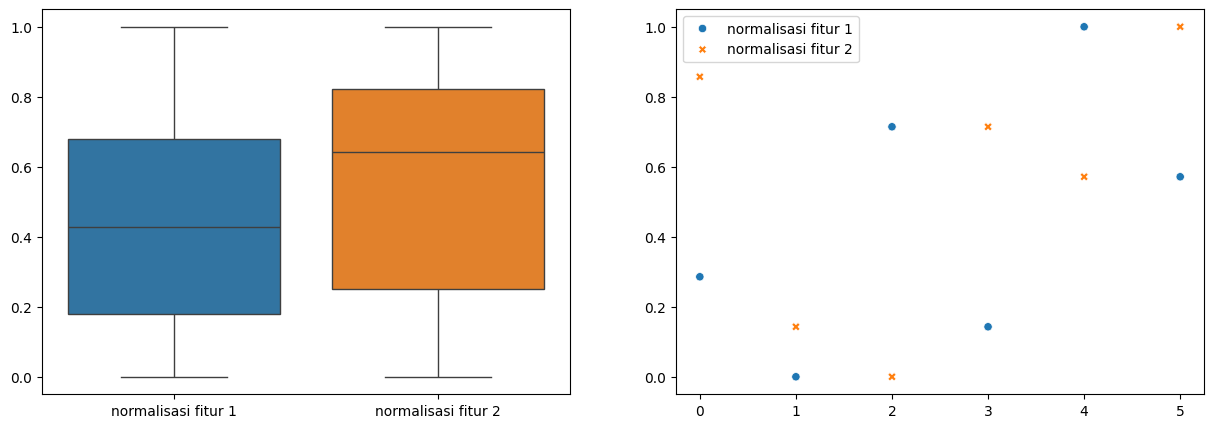

In [9]:
fig, axs= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[0])
sns.scatterplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[1])

# Normalisasi 3

In [10]:
df=pd.DataFrame(data)

In [11]:
def normalize(column):
    normal_data=(2*column - (column.max() + column.min())) / (column.max() - column.min())
    return normal_data

for col in df.columns:
    df[f'normalisasi {col}'] = normalize(df[col])

df

,fitur 1,fitur 2,normalisasi fitur 1,normalisasi fitur 2
0,4,8,-0.428571,0.714286
1,2,3,-1.000000,-0.714286
2,7,2,0.428571,-1.000000
3,3,7,-0.714286,0.428571
4,9,6,1.000000,0.142857
5,6,9,0.142857,1.000000


<Axes: >

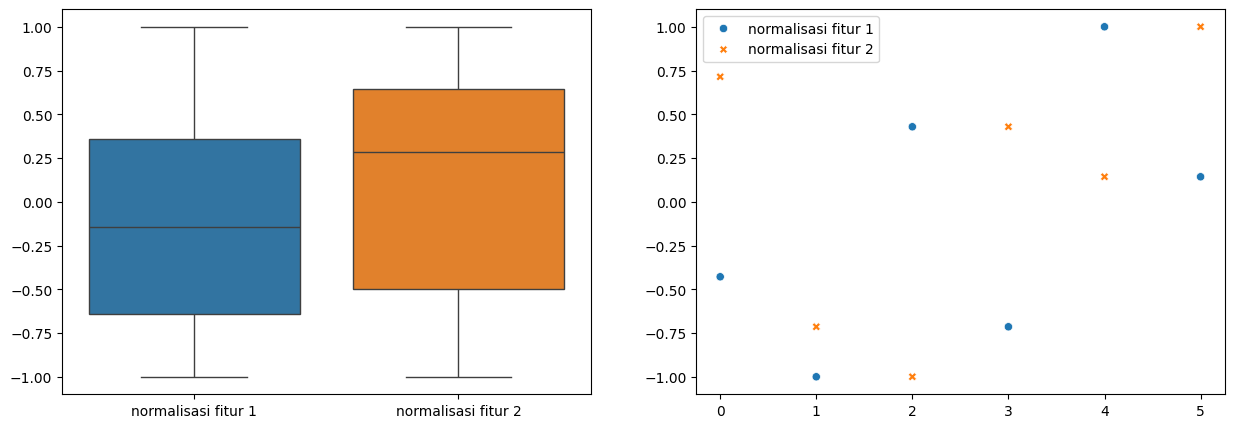

In [12]:
fig, axs= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[0])
sns.scatterplot(data=df[['normalisasi fitur 1', 'normalisasi fitur 2']], ax=axs[1])

# SOAL 3

In [26]:
df=pd.read_excel('wisatawan bali.xlsx')

In [27]:
df.head()

,date,tournum
0,2019-01-01,60521
1,2019-02-01,57609
2,2019-03-01,58698
3,2019-04-01,65576
4,2019-05-01,53056


In [28]:
df.describe()

,date,tournum
count,60,60.000000
mean,2021-06-16 06:24:00,102560.550000
min,2019-01-01 00:00:00,0.000000
25%,2020-03-24 06:00:00,44826.000000
50%,2021-06-16 00:00:00,71023.000000
75%,2022-09-08 12:00:00,131846.750000
max,2023-12-01 00:00:00,547384.000000
std,NaN,103822.405567


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     60 non-null     datetime64[ns]
 1   tournum  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [31]:
df.set_index('date', inplace=True)
df.head()

,tournum
date,
2019-01-01,60521
2019-02-01,57609
2019-03-01,58698
2019-04-01,65576
2019-05-01,53056


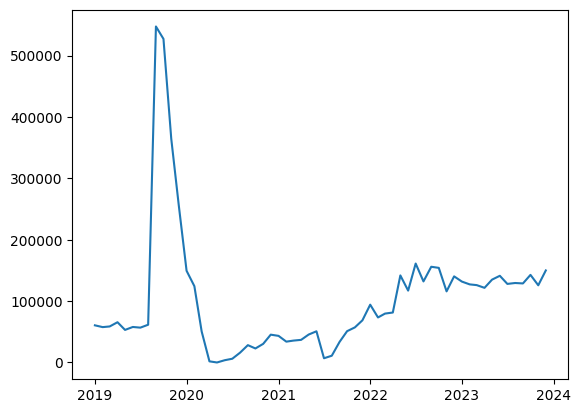

In [32]:
plt.plot(df['tournum'])

In [44]:
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [34]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df)
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue} if p-value < 0.05, data is stationary')
print(f'Critical Values: {critical_values}')

ADF Statistic: -2.373120863753996
p-value: 0.1494669858116317 if p-value < 0.05, data is stationary
Critical Values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}


In [35]:
df['year'] = df.index.year
df['month'] = df.index.month

<Axes: xlabel='month', ylabel='tournum'>

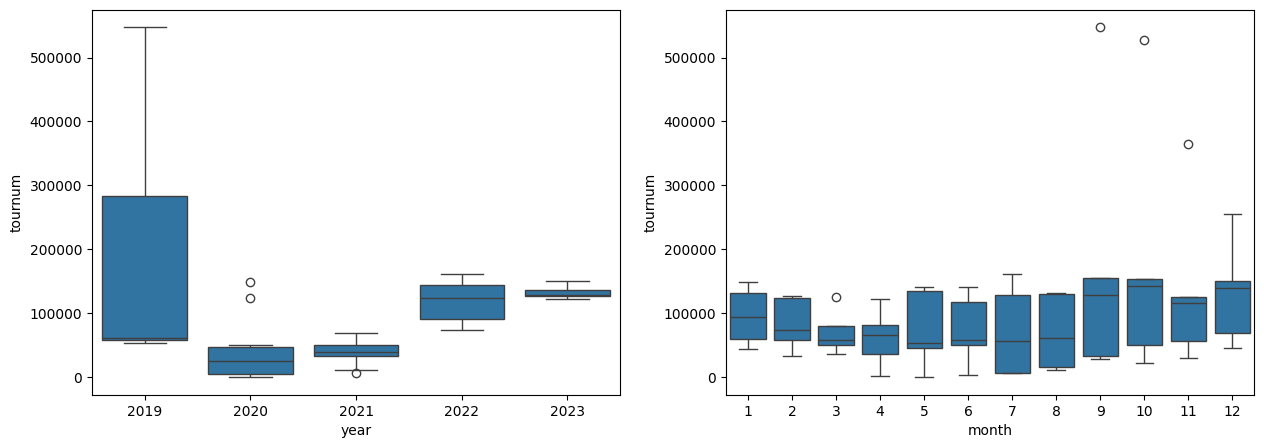

In [39]:
fig, axs= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(df, x='year', y='tournum', ax=axs[0])
sns.boxplot(df, x='month', y='tournum', ax=axs[1])

In [40]:
decomposed= seasonal_decompose(df['tournum'], model='additive')

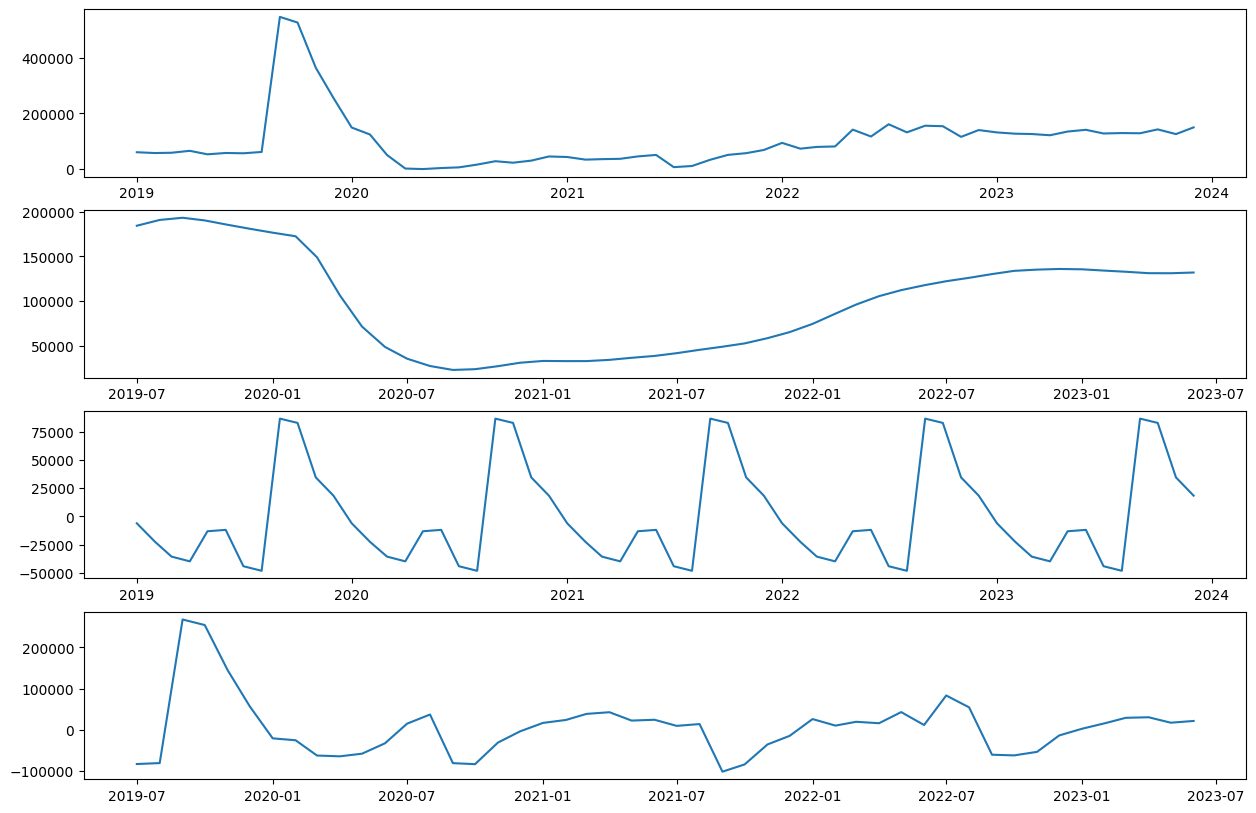

In [43]:
trend= decomposed.trend
seasonal= decomposed.seasonal
residual= decomposed.resid
fig, axs= plt.subplots(4,1, figsize=(15,10))
axs[0].plot(df['tournum'], label='Original')
axs[1].plot(trend, label='Trend')
axs[2].plot(seasonal, label='Trend')
axs[3].plot(residual, label='Trend')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

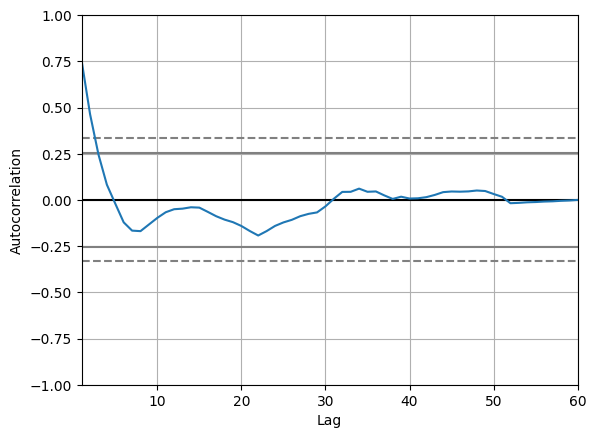

In [45]:
autocorrelation_plot(df['tournum'])

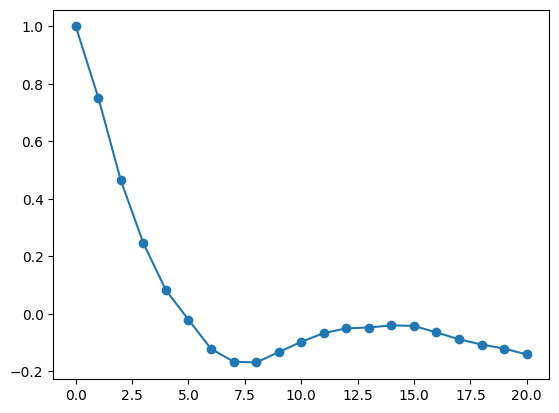

In [46]:
plt.plot(acf(df['tournum'], nlags=20), marker='o')

# MODELLING ARIMA

In [52]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [138]:
size= int(len(df)*0.8)
train, test= df[0:size], df[size:len(df)]

In [139]:
arima_model= auto_arima(train['tournum'], start_p=1, d=0, start_q=1, max_p=5,  max_q=5,
                        start_P=1, start_Q=1, max_P=5, max_Q=5, 
                        seasonal=True, trace=True, error_action='ignore', suppress_warnings=True,
                        stepwise=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1220.582, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1257.894, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1220.920, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1233.256, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1281.319, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1222.248, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1222.956, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1228.507, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1220.118, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1222.156, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1224.230, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1223.085, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.367 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -606.059
Date:                Fri, 09 May 2025   AIC                           1220.118
Time:                        18:09:02   BIC                           1227.603
Sample:                    01-01-2019   HQIC                          1222.947
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.095e+04   2.45e+04      1.266      0.206    -1.7e+04    7.89e+04
ar.L1          0.9155      0.707      1.295      0.195      -0.470       2.301
ar.L2         -0.2359      0.619     -0.381      0.703      -1.450       0.978
sigma2      5.534e+09      1.188   4.66e+09      0.000    5.53e+09    5.53e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2567.91
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             5.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+28. Standard errors may be unstable.
"""

In [158]:
model= SARIMAX(train['tournum'], order=(2,0,0), seasonal_order=(0,0,0,0))

d:\pythonapps\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\pythonapps\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [159]:
result= model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                tournum   No. Observations:                   48
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -608.543
Date:                Fri, 09 May 2025   AIC                           1223.085
Time:                        18:13:05   BIC                           1228.699
Sample:                    01-01-2019   HQIC                          1225.207
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9900      0.756      1.310      0.190      -0.492       2.472
ar.L2         -0.1702      0.736     -0.231      0.817      -1.612       1.272
sigma2      6.079e+09   1.42e-09   4.29e+18      0.0

In [160]:
start=0
end= len(train)-1
train_pred= result.predict(start, end).rename('Train Prediction')

In [161]:
start_test= len(train)
end_test= len(df)-1
test_pred= result.predict(start_test, end_test).rename('Test Prediction')

<Axes: xlabel='date'>

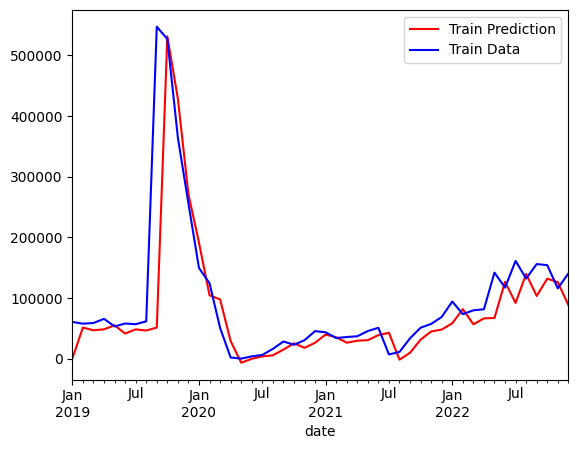

In [162]:
train_pred.plot(legend=True, label='Train Prediction', color='red')
train['tournum'].plot(legend=True, label='Train Data', color='blue')

<Axes: xlabel='date'>

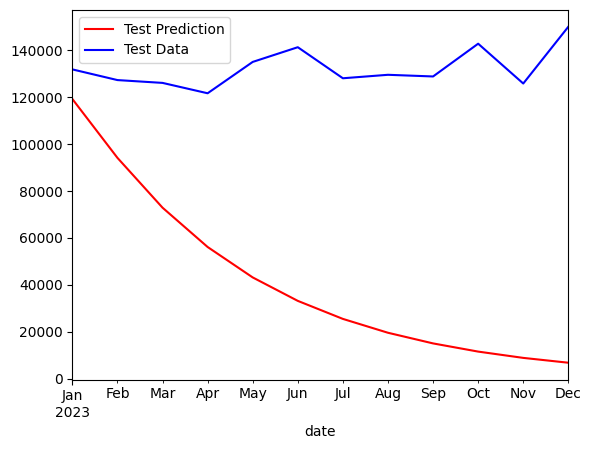

In [163]:
test_pred.plot(legend=True, label='Test Prediction', color='red')
test['tournum'].plot(legend=True, label='Test Data', color='blue')

In [144]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -606.059
Date:                Fri, 09 May 2025   AIC                           1220.118
Time:                        18:09:20   BIC                           1227.603
Sample:                    01-01-2019   HQIC                          1222.947
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.095e+04   2.45e+04      1.266      0.206    -1.7e+04    7.89e+04
ar.L1          0.9155      0.707      1.295      0.195      -0.470       2.301
ar.L2         -0.2359      0.619     -0.381      0.7

In [154]:
start=0
end= len(train)-1
train_pred1= arima_model.predict(start_test, end_test).rename('Train Prediction')

In [146]:
start_test= len(train)
end_test= len(df)-1
test_pred1= arima_model.predict(len(test)).rename('Test Prediction')

<Axes: xlabel='date'>

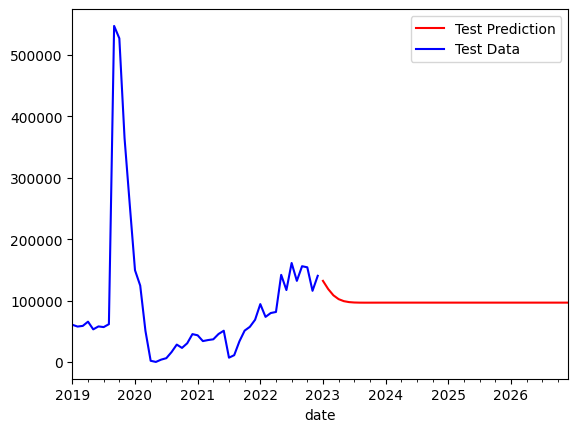

In [155]:
clip = len(train)

train_plt = train[:clip]
forecast_plt = train_pred1[:clip]

train_pred1.plot(legend=True, label='Test Prediction', color='red')
train['tournum'].plot(legend=True, label='Test Data', color='blue')

<Axes: xlabel='date'>

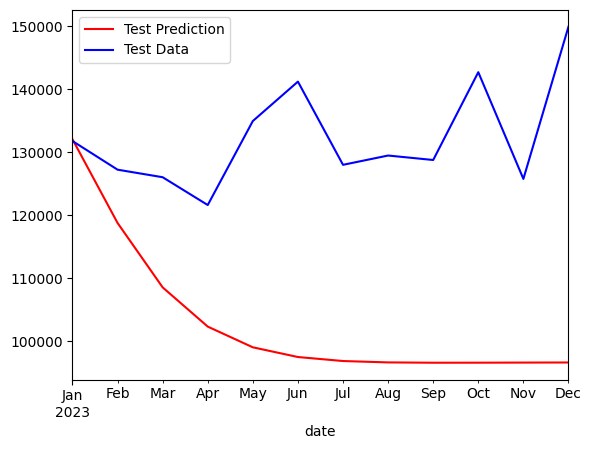

In [133]:
clip = len(test)

test_plt = test[:clip]
forecast_plt = test_pred1[:clip]

forecast_plt.plot(legend=True, label='Test Prediction', color='red')
test_plt['tournum'].plot(legend=True, label='Test Data', color='blue')

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(test['tournum'], test_pred)
mae = mean_absolute_error(test['tournum'], test_pred)
rmse = np.sqrt(mean_squared_error(test['tournum'], test_pred))
r2 = r2_score(test['tournum'], test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2: {r2:.2f}%")

Mean Squared Error (MSE): 9609396214.39
Mean Absolute Error (MAE): 90115.78
Root Mean Squared Error (RMSE): 98027.53
R2: -149.06%
